## ROC CURVE

In [1]:
from sklearn import metrics

In [2]:
y_test = [0,0,1,1]
y_pred = [0,1,1,1]
y_pred2= [0,0,0,1]

test = [1,1,1,1]

In [3]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, y_pred2)

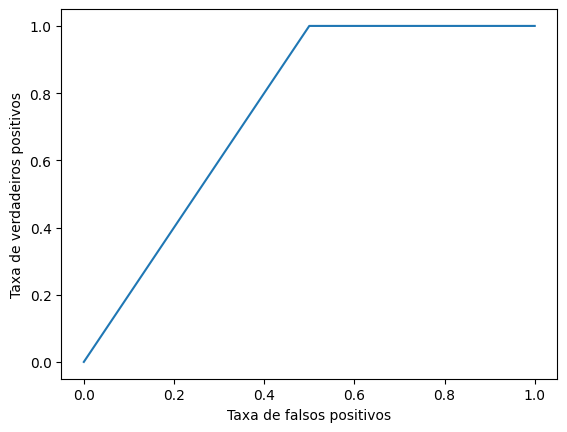

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(fpr,tpr)
# ax.plot(fpr2,tpr2)

plt.xlabel('Taxa de falsos positivos',fontsize=10)
plt.ylabel('Taxa de verdadeiros positivos',fontsize=10)

plt.show()

In [5]:
metrics.confusion_matrix(y_test,y_pred)

array([[1, 1],
       [0, 2]], dtype=int64)

In [6]:
fpr

array([0. , 0.5, 1. ])

In [7]:
tpr

array([0., 1., 1.])

In [8]:
import pandas as pd

In [9]:
base = {
    'valores': [1,1.2,1.5,1.6,1.65,2.6,2.65,2.7,2.88,2.9],
    'classes': [1,0,0,0,0,1,1,1,0,1]
}

base = pd.DataFrame(base)

In [10]:
base

,valores,classes
0,1.00,1
1,1.20,0
2,1.50,0
3,1.60,0
4,1.65,0
5,2.60,1
6,2.65,1
7,2.70,1
8,2.88,0
9,2.90,1


In [11]:
X = base.valores
y = base.classes

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

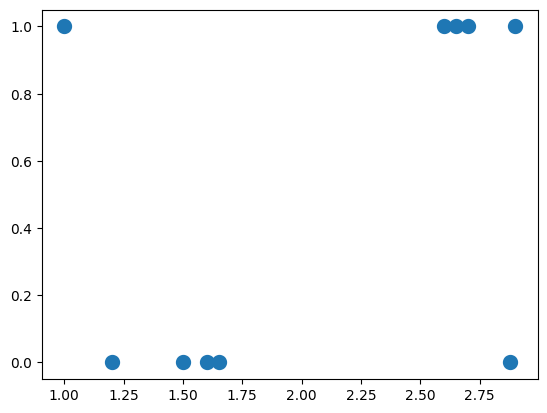

In [13]:
fig, ax = plt.subplots()

ax.scatter(X, y, linewidths=5)

plt.show()

## ARVORE DE DECISAO

In [14]:
from sklearn import tree

In [15]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train.values.reshape(-1, 1), y_train)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
y_pred = clf.predict(X_test.values.reshape(-1, 1))
confusion_matrix(y_test, y_pred)

array([[2, 1],
       [0, 1]], dtype=int64)

In [18]:
y_test

2    0
8    0
4    0
9    1
Name: classes, dtype: int64

In [19]:
y_pred

array([0, 1, 0, 1], dtype=int64)

In [20]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

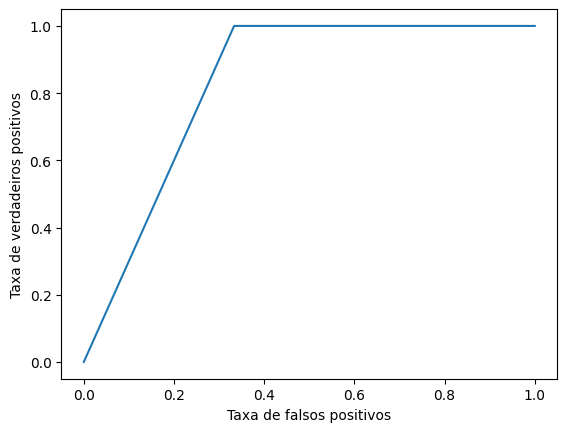

In [21]:
fig, ax = plt.subplots()

ax.plot(fpr,tpr)
# ax.plot(fpr2,tpr2)

plt.xlabel('Taxa de falsos positivos',fontsize=10)
plt.ylabel('Taxa de verdadeiros positivos',fontsize=10)

plt.show()

In [22]:
fpr

array([0.        , 0.33333333, 1.        ])

In [23]:
tpr

array([0., 1., 1.])

## PREDICT PROBA NA ARVORE DE DECISAO

In [24]:
y_predpb = clf.predict_proba(X_test.values.reshape(-1, 1))

In [25]:
y_predpb = y_predpb[:,1]

In [26]:
y_predpb

array([0., 1., 0., 1.])

In [27]:
y_test

2    0
8    0
4    0
9    1
Name: classes, dtype: int64

In [28]:
fprpb, tprpb, thresholdspb = metrics.roc_curve(y_test, y_predpb)

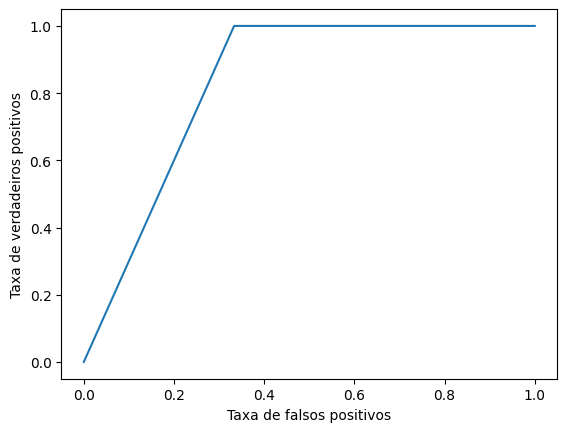

In [29]:
fig, ax = plt.subplots()

ax.plot(fprpb,tprpb)
# ax.plot(fpr2,tpr2)

plt.xlabel('Taxa de falsos positivos',fontsize=10)
plt.ylabel('Taxa de verdadeiros positivos',fontsize=10)

plt.show()

## LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clflr = LogisticRegression(random_state=0).fit(X_train.values.reshape(-1, 1), y_train)

In [32]:
y_predlr = clflr.predict(X_test.values.reshape(-1, 1))

In [33]:
y_predlr

array([1, 1, 1, 1], dtype=int64)

In [34]:
y_test

2    0
8    0
4    0
9    1
Name: classes, dtype: int64

## predict_proba

In [35]:
y_predlr2 = clflr.predict_proba(X_test.values.reshape(-1, 1))

In [36]:
#tratando o predict_proba para ter os valores corretos
y_predlr2 = y_predlr2[:,1] #PEGANDO TODAS AS LINHAS, POREM SOMENTE DA PRIMEIRA COLUNA

In [37]:
y_predlr2

array([0.60444845, 0.79355508, 0.62815317, 0.79573665])

In [38]:
y_test

2    0
8    0
4    0
9    1
Name: classes, dtype: int64

## decision_function

In [39]:
y_predlr3 = clflr.decision_function(X_test.values.reshape(-1, 1))

In [40]:
y_predlr3

array([0.42403527, 1.34648928, 0.52430201, 1.35985818])

In [41]:
y_test

2    0
8    0
4    0
9    1
Name: classes, dtype: int64

In [42]:
fprRL, tprRL, thresholdsRL = metrics.roc_curve(y_test, y_predlr3)

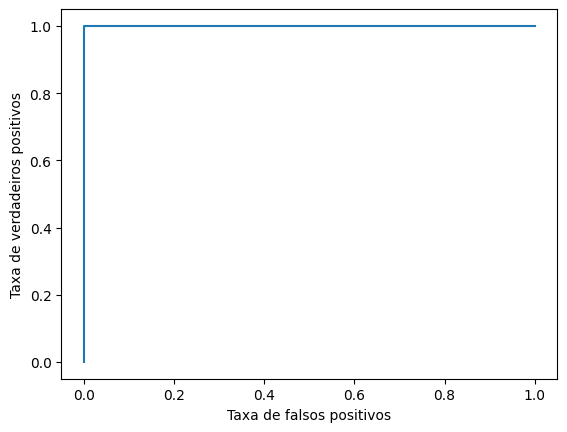

In [43]:
fig, ax = plt.subplots()

ax.plot(fprRL,tprRL)
# ax.plot(fpr2,tpr2)

plt.xlabel('Taxa de falsos positivos',fontsize=10)
plt.ylabel('Taxa de verdadeiros positivos',fontsize=10)

plt.show()

In [44]:
y_test

2    0
8    0
4    0
9    1
Name: classes, dtype: int64

In [45]:
y_predlr3

array([0.42403527, 1.34648928, 0.52430201, 1.35985818])

In [46]:
fprRL

array([0., 0., 1.])

In [47]:
tprRL

array([0., 1., 1.])

## CURVA PRECISION RECALL

In [48]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
precisionLR, recallLR, thresholdsLR = metrics.precision_recall_curve(y_test, y_predlr)

In [49]:
precision

array([0.25, 0.5 , 1.  ])

In [50]:
recall

array([1., 1., 0.])

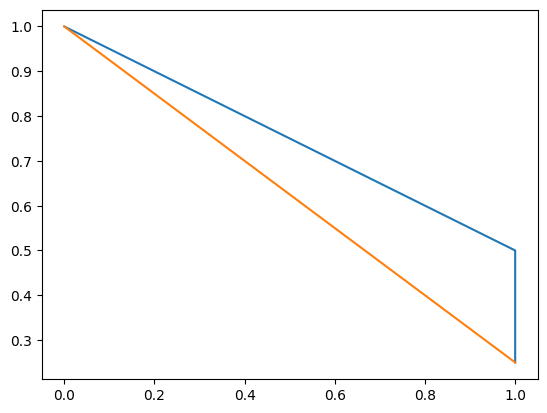

In [51]:
fig, ax = plt.subplots()

ax.plot(recall,precision)
ax.plot(recallLR,precisionLR)

plt.show()

In [52]:
metrics.auc(recall,precision)

0.75

In [53]:
metrics.auc(recallLR,precisionLR)

0.625